In [39]:
# =======================================
# DeepRacer Simple Log Visualization
# =======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path

In [42]:
# --- Load CSV ---
# Replace with your CSV file path or upload via Colab
log_dir = "/Users/johannmai/Desktop/Nga/42Horsepower/training_log/"
df = pd.read_csv(os.path.join(log_dir, "test1_racer2/055752f4-3e96-4e5f-b2bb-ffb6e99fa22b/sim-trace/evaluation/20250812104443-h1lswyHIQcOGQ8_aIWgwAQ/evaluation-simtrace/0-iteration.csv"))

In [43]:
# --- Derived metrics ---
df["speed"] = df["throttle"]  # If throttle directly maps to speed (adjust if you have actual m/s)
# If throttle is gear-like instead of real m/s, you might need: df["speed"] = df["throttle"] * speed_scale
df["episode"] = df["episode"].astype(int)

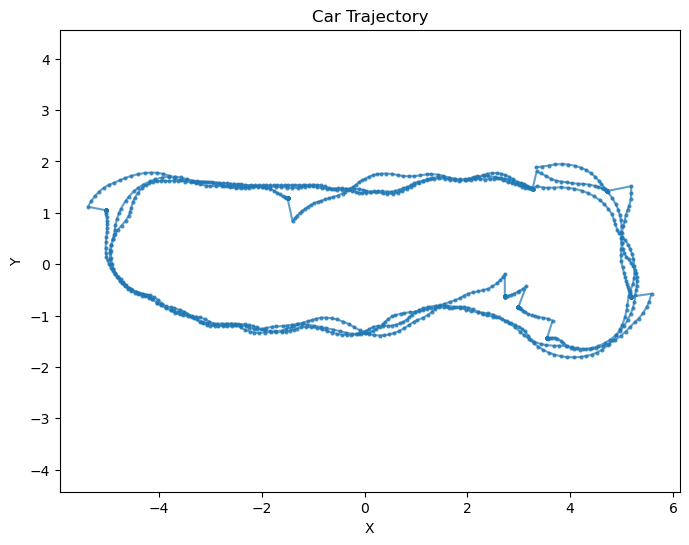

In [44]:
# --- 1. Plot Waypoints / Trajectory ---
plt.figure(figsize=(8, 6))
plt.plot(df["X"], df["Y"], marker="o", markersize=2, linestyle="-", alpha=0.7)
plt.title("Car Trajectory")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()

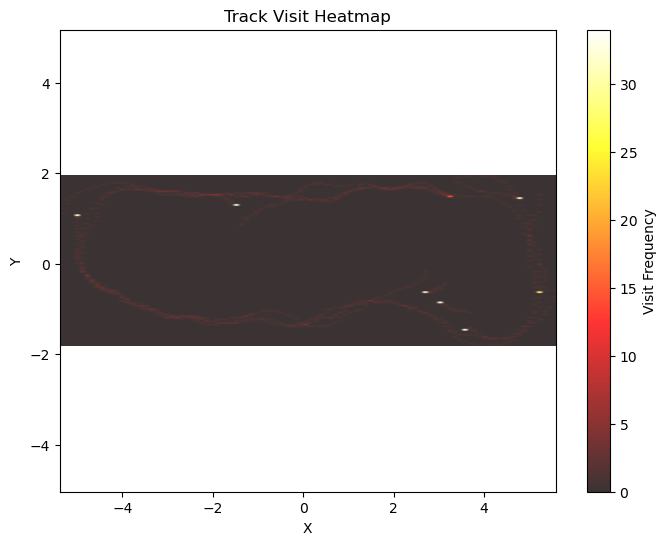

In [45]:
# --- 2. Heatmap of Track Visits ---
plt.figure(figsize=(8, 6))
heatmap, xedges, yedges = np.histogram2d(df["X"], df["Y"], bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot', alpha=0.8)
plt.colorbar(label="Visit Frequency")
plt.title("Track Visit Heatmap")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()

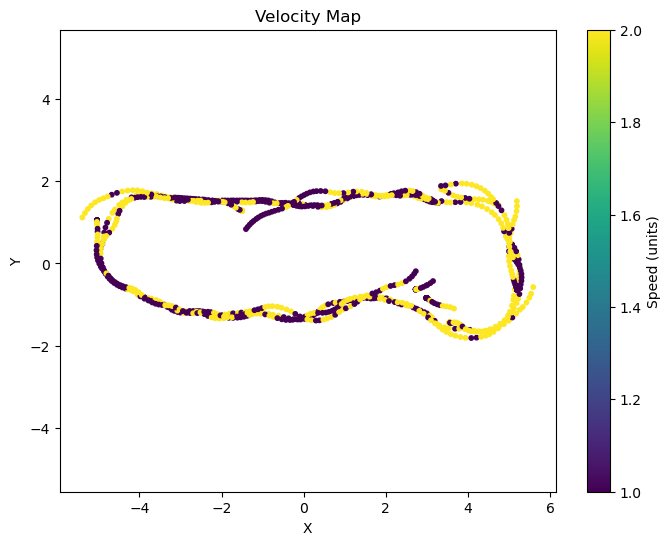

In [46]:
# --- 3. Velocity Map ---
plt.figure(figsize=(8, 6))
sc = plt.scatter(df["X"], df["Y"], c=df["speed"], cmap="viridis", s=10)
plt.colorbar(sc, label="Speed (units)")
plt.title("Velocity Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()

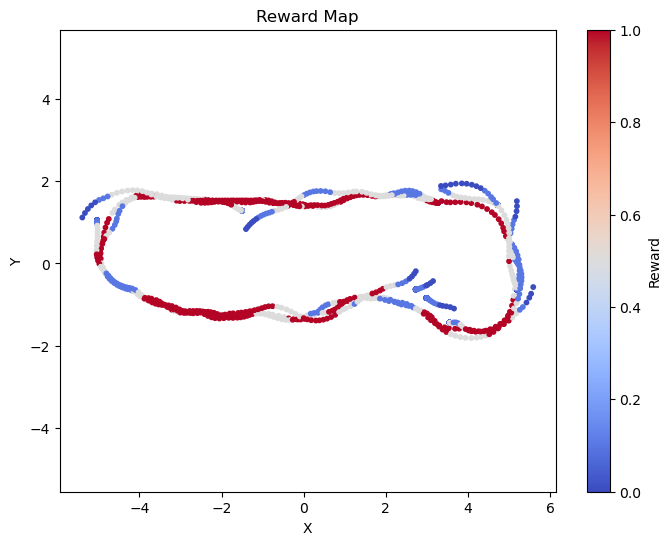

In [47]:
# --- 4. Reward Map ---
plt.figure(figsize=(8, 6))
sc = plt.scatter(df["X"], df["Y"], c=df["reward"], cmap="coolwarm", s=10)
plt.colorbar(sc, label="Reward")
plt.title("Reward Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()

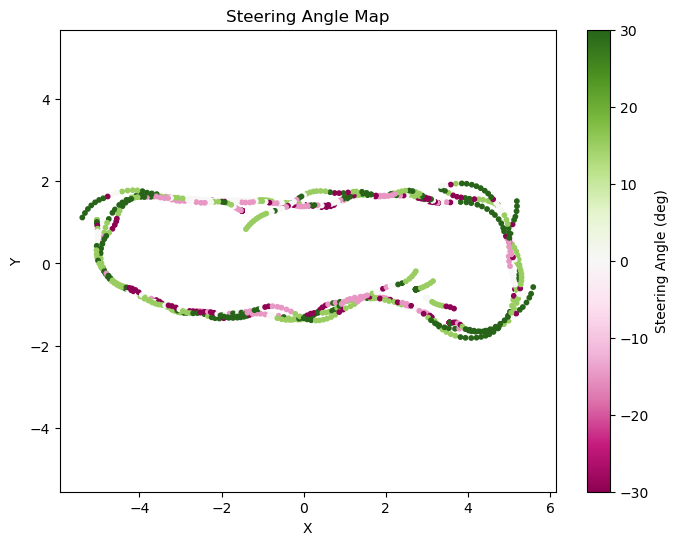

In [48]:
# =======================================
# 5. Steering Angle Map
# =======================================
plt.figure(figsize=(8, 6))
sc = plt.scatter(df["X"], df["Y"], c=df["steer"], cmap="PiYG", s=10)
plt.colorbar(sc, label="Steering Angle (deg)")
plt.title("Steering Angle Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()

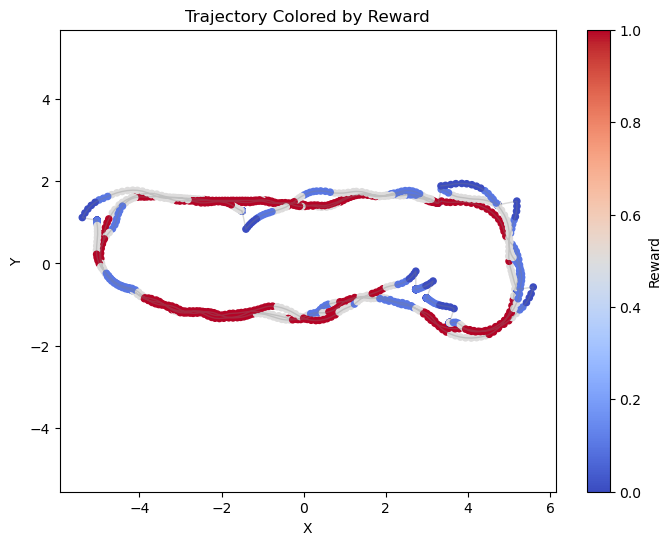

In [49]:
# =======================================
# 6. Reward Density Overlay on Trajectory
# =======================================
plt.figure(figsize=(8, 6))
plt.plot(df["X"], df["Y"], color='grey', alpha=0.3, linestyle='-', linewidth=1)
sc = plt.scatter(df["X"], df["Y"], c=df["reward"], cmap="coolwarm", s=20)
plt.colorbar(sc, label="Reward")
plt.title("Trajectory Colored by Reward")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.show()

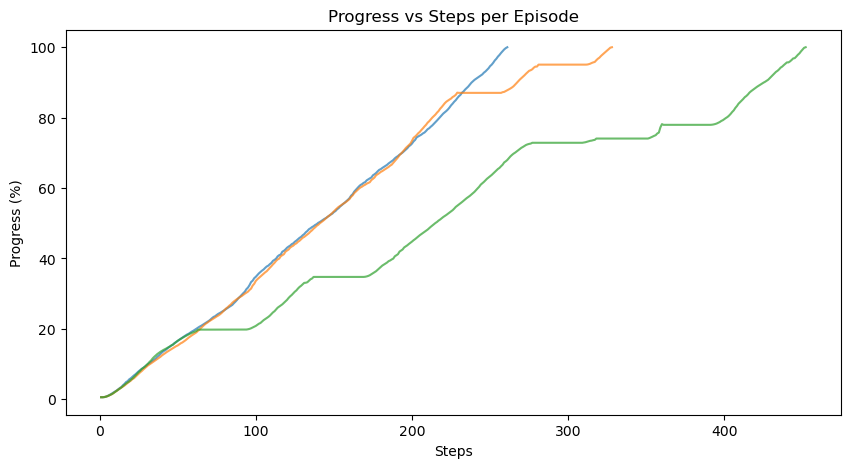

In [50]:
# =======================================
# 7. Episode-by-Episode Progress
# =======================================
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="steps", y="progress", hue="episode", palette="tab10", alpha=0.7, legend=False)
plt.title("Progress vs Steps per Episode")
plt.xlabel("Steps")
plt.ylabel("Progress (%)")
plt.show()